In [1]:
#angulos de auler
#analisis estadistico con mannWhitneyUtests me muestra la significancia entre dos columnas de datos o podemos trabajar oneway anova
#esta significancia necesita un target
#la linea de la mediana en los boxplots despues de hacerle un analisis de relevancia, se puede ver el % de la articulacion con mayor relevancia en la aplicacion, los mas significativos se dejan y los otros se eliminan
#generalmente los modelos de machine learning se guian por la caracteristica que tenga mayor magnitud en comparacion que los otros targets, se debe tener cuidado con eso.
#distancia euclidiada entre datos de distintas dimensiones

"""
TAREA
- Juntar todos los datos en un csv y distinguir si es masculino o femenino para la identificacion de la persona
  el csv debe ir los datos antropometricos, fisicas y psicologicas, caracteristicas por columnas.
- Buscar oneway ANOVA y mann-Whitney-U-tests en matlab.
- Cargar los archivos BVH en python y constuir para cada video un Dataframe, todos los videos deben tener un mismo numero de filas, las columnas son el tiempo, (para cada sujeto)
"""

#Portafolio con trabajos en GitHub

'\nTAREA\n- Juntar todos los datos en un csv y distinguir si es masculino o femenino para la identificacion de la persona\n  el csv debe ir los datos antropometricos, fisicas y psicologicas, caracteristicas por columnas.\n- Buscar oneway ANOVA y mann-Whitney-U-tests en matlab.\n- Cargar los archivos BVH en python y constuir para cada video un Dataframe, todos los videos deben tener un mismo numero de filas, las columnas son el tiempo, (para cada sujeto)\n'

In [2]:
!git clone https://github.com/jdpulgarin/Tennis-MoCap/
!pip install transforms3d
!pip install --upgrade bvh
!pip install pandas
!pip install PyGithub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn as skl
import scipy as sp
import seaborn as sns
import plotly.express as px


Cloning into 'Tennis-MoCap'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 124 (delta 7), reused 115 (delta 3), pack-reused 4
Receiving objects: 100% (124/124), 75.89 MiB | 19.70 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Updating files: 100% (103/103), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for transforms3d: filename=transforms3d-0.4.1-py3-none-any.whl size=1376757 sha256=7e139ea90f3cf7851fa18d0d2c00c8c1f3f73b6222261a9555e3f9630bcfc444
  Stored in directory: /root/.cache/pip/wheels/06/37/d0/6e0fe02010be074e8138f2b5ffff5254b74751aafb60bb5666
Successfully built transforms3d
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Pr

In [3]:
url1 = 'https://raw.githubusercontent.com/jesusf65/BHV-taller/main/DatosTenistasFISICOS%20-%20Hoja%202%20(2).csv'
url2 = 'https://raw.githubusercontent.com/jesusf65/BHV-taller/main/DatosTenistasantro%20-%20Hoja%201.csv'
df = pd.read_csv(url1) #datos fisicos
df = df.sort_values(by='Desempeno')
df_antro = pd.read_csv(url2)
df_antro = df_antro.drop(4, axis=0)     #Elimino la persona que tiene rendimiendo 2
df_antro = df_antro.sort_values(by='Desempeño')
df = df.drop(3, axis =0)    #Elimino la persona que tiene rendimiendo 2
df

#target de genero, desempeño (estaba en variables psicologicas pero no esta disponible)
#Se elimino Talla sentado, pliegues cutaneos, perimetros, perimetros, diametros, toracica anteroposterior y transversal por datos faltantes
#KPCA me separa mas las clases de forma mas lineal, PCA no me separa tanto las clases por lo que puede dificultarse el metodo de clasificación

,Tenista,fecha_evaluacion,fecha_nacimiento,Genero,abdominales_60s,lagartijas,wells1,wells2,hombros1,hombros2,...,dj_tiempo2_seg,dj_altura2_pulg,tiempo_tierrau15_seg,indice_potencia_explosiva_u15,xsal_u15_pulg,tiempo_tierrap15_seg,indice_potencia_explosiva_p15,xsal_p15_pulg,factor_fatiga,Desempeno
0,1,25/03/2014,27/05/2000,F,44,4,9,10,+7,+7,...,"0,48","11,1","0,38","1,2","10,3","0,41","1,19","11,4","1,0",0
1,3,25/03/2014,8/02/1999,M,54,26,-4,1,+9,+9,...,"0,57","15,9","0,27","1,74","10,9","0,36","1,42","12,9","1,22",0
5,8,25/03/2014,9/08/2000,M,58,24,-6,-12,+10,+10,...,"0,54","14,1","0,37","1,19","9,3","0,35","1,24","8,9","0,95",0
6,9,27/03/2014,15/06/1996,M,32,39,-22,-20,1,0,...,"0,66","21,0","0,27","1,88","12,5","0,28","1,77","11,7","1,06",0
7,10,27/02/2015,26/03/1995,M,43,18,20,19,0,0,...,"0,6","17,9","0,40","1,32","13,3","0,32","1,62",13,"0,81",0
8,11,25/03/2014,30/10/1994,M,53,41,3,6,0,+6,...,"0,63","19,6","0,24","2,3",14,"0,24","2,32","15,8","0,96",0
9,12,27/03/2014,15/09/1994,M,38,6,-12,-1,NaN,NaN,...,"0,57","16,0","0,26","1,80","11,1","0,26","1,93","12,2","0,93",0
10,13,25/03/2014,18/05/2000,F,24,10,-15,-11,+10,+9,...,"0,54","14,5","0,28","1,59","10,0","0,28","1,67","10,8","0,95",0
13,17,18/02/2015,18/10/1993,M,52,27,0,0,0,0,...,"0,65","20,7","0,32","1,56",12,"0,23","1,79","8,60","0,87",0
2,4,18/02/2015,13/06/1997,M,52,30,11,12,0,0,...,"0,60","17,7","0,25","17,5","9,4","0,26","1,84","11,1","0,95",1


In [4]:
df = df.replace(np.NaN, 0)
df.iloc[:, 4:] = df.iloc[:, 4:].replace(',', '.', regex=True)

# Convertir las columnas de objetos a números
df.iloc[:, 4:] = df.iloc[:, 4:].astype(float)
df

<ipython-input-4-c95e067d0304>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 4:] = df.iloc[:, 4:].astype(float)


,Tenista,fecha_evaluacion,fecha_nacimiento,Genero,abdominales_60s,lagartijas,wells1,wells2,hombros1,hombros2,...,dj_tiempo2_seg,dj_altura2_pulg,tiempo_tierrau15_seg,indice_potencia_explosiva_u15,xsal_u15_pulg,tiempo_tierrap15_seg,indice_potencia_explosiva_p15,xsal_p15_pulg,factor_fatiga,Desempeno
0,1,25/03/2014,27/05/2000,F,44.0,4.0,9.0,10.0,7.0,7.0,...,0.48,11.1,0.38,1.20,10.3,0.41,1.19,11.4,1.00,0.0
1,3,25/03/2014,8/02/1999,M,54.0,26.0,-4.0,1.0,9.0,9.0,...,0.57,15.9,0.27,1.74,10.9,0.36,1.42,12.9,1.22,0.0
5,8,25/03/2014,9/08/2000,M,58.0,24.0,-6.0,-12.0,10.0,10.0,...,0.54,14.1,0.37,1.19,9.3,0.35,1.24,8.9,0.95,0.0
6,9,27/03/2014,15/06/1996,M,32.0,39.0,-22.0,-20.0,1.0,0.0,...,0.66,21.0,0.27,1.88,12.5,0.28,1.77,11.7,1.06,0.0
7,10,27/02/2015,26/03/1995,M,43.0,18.0,20.0,19.0,0.0,0.0,...,0.60,17.9,0.40,1.32,13.3,0.32,1.62,13.0,0.81,0.0
8,11,25/03/2014,30/10/1994,M,53.0,41.0,3.0,6.0,0.0,6.0,...,0.63,19.6,0.24,2.30,14.0,0.24,2.32,15.8,0.96,0.0
9,12,27/03/2014,15/09/1994,M,38.0,6.0,-12.0,-1.0,0.0,0.0,...,0.57,16.0,0.26,1.80,11.1,0.26,1.93,12.2,0.93,0.0
10,13,25/03/2014,18/05/2000,F,24.0,10.0,-15.0,-11.0,10.0,9.0,...,0.54,14.5,0.28,1.59,10.0,0.28,1.67,10.8,0.95,0.0
13,17,18/02/2015,18/10/1993,M,52.0,27.0,0.0,0.0,0.0,0.0,...,0.65,20.7,0.32,1.56,12.0,0.23,1.79,8.6,0.87,0.0
2,4,18/02/2015,13/06/1997,M,52.0,30.0,11.0,12.0,0.0,0.0,...,0.60,17.7,0.25,17.50,9.4,0.26,1.84,11.1,0.95,1.0


In [5]:
df_antro = df_antro.replace(np.NaN, 0)
df_antro.iloc[:, 4:] = df_antro.iloc[:, 4:].replace(',', '.', regex=True)

# Convertir las columnas de objetos a números
df_antro.iloc[:, 4:] = df_antro.iloc[:, 4:].astype(float)
df_antro

<ipython-input-5-f50a00eb5e95>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_antro.iloc[:, 4:] = df_antro.iloc[:, 4:].astype(float)


,Tenista,Genero,fecha_evaluacion,fecha_nacimiento,masa_kg,estatura_cm,envergadura_cm,longitud_pie_cm,triceps_mm,subescapular_mm,...,muslo_1cm_cm,muslo_medio_cm,pantorrilla_maxima_cm,tobillo_minimo_cm,biacromial_cm,biiliocrestal_cm,biestiloideo_cm,humero_cm,femur_rodilla_cm,Desempeño
0,1,F,25/03/2014,27/05/2000,65.5,166.8,167.0,25.1,16.8,11.0,...,59.6,54.7,39.7,25.2,35.0,28.1,5.7,6.6,9.7,0.0
1,2,M,18/02/2015,21/12/1991,62.7,170.5,168.0,0.0,7.7,9.5,...,54.8,49.2,36.7,21.5,38.3,25.6,5.2,6.5,9.6,0.0
2,3,M,25/03/2014,8/02/1999,64.2,179.0,182.2,26.0,6.8,7.4,...,52.4,48.9,36.1,21.1,41.0,26.3,5.7,7.2,9.7,0.0
5,8,M,25/03/2014,9/08/2000,54.5,164.2,165.0,25.6,8.8,11.6,...,51.0,46.4,33.7,21.0,34.9,27.8,5.3,6.5,9.7,0.0
6,10,M,27/02/2015,26/03/1995,77.5,171.1,178.5,0.0,13.9,12.4,...,62.1,55.9,39.7,22.4,41.2,29.5,5.1,7.7,10.0,0.0
7,11,M,25/03/2014,30/10/1994,65.5,177.8,180.4,25.1,6.6,7.2,...,51.2,47.8,36.5,21.5,40.8,28.4,5.0,7.1,9.5,0.0
8,12,M,27/03/2014,15/09/1994,54.4,179.2,182.8,26.3,8.6,6.5,...,45.0,44.2,35.0,21.5,37.2,28.3,5.1,6.9,9.4,0.0
9,13,F,25/03/2014,18/05/2000,48.6,158.0,155.2,22.6,18.8,12.4,...,50.3,45.9,32.2,20.2,32.4,26.5,5.0,5.5,8.9,0.0
11,15,F,27/02/2015,6/05/2002,0.0,0.0,0.0,0.0,13.2,6.2,...,45.2,40.4,29.6,20.0,0.0,0.0,0.0,0.0,0.0,0.0
13,17,M,18/02/2015,18/10/1993,55.4,166.4,164.3,0.0,10.0,7.6,...,51.3,47.8,33.8,21.7,36.6,24.5,4.7,6.3,9.1,0.0


Calculo edad para datos fisicos

In [6]:
import datetime

#Calculo de la edad a todos los pacientes
df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'])
df['fecha_evaluacion']  = pd.to_datetime(df['fecha_evaluacion'])
hoy = datetime.datetime.now()
df['Edad'] = ((df['fecha_evaluacion']  - df['fecha_nacimiento']) / 365).dt.days  
df.Edad[df.Edad<0] = 0
df = df.drop(['fecha_evaluacion','fecha_nacimiento'], axis=1)
df = df.replace('F',0)
df = df.replace('M',1)
df

<ipython-input-6-55a2c0ee20b4>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'])
<ipython-input-6-55a2c0ee20b4>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['fecha_evaluacion']  = pd.to_datetime(df['fecha_evaluacion'])
<ipython-input-6-55a2c0ee20b4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Edad[df.Edad<0] = 0


,Tenista,Genero,abdominales_60s,lagartijas,wells1,wells2,hombros1,hombros2,reaccion1_tiempo_seg,reaccion2_tiempo_seg,...,dj_altura2_pulg,tiempo_tierrau15_seg,indice_potencia_explosiva_u15,xsal_u15_pulg,tiempo_tierrap15_seg,indice_potencia_explosiva_p15,xsal_p15_pulg,factor_fatiga,Desempeno,Edad
0,1,0,44.0,4.0,9.0,10.0,7.0,7.0,0.410,0.320,...,11.1,0.38,1.20,10.3,0.41,1.19,11.4,1.00,0.0,13
1,3,1,54.0,26.0,-4.0,1.0,9.0,9.0,0.260,0.350,...,15.9,0.27,1.74,10.9,0.36,1.42,12.9,1.22,0.0,14
5,8,1,58.0,24.0,-6.0,-12.0,10.0,10.0,0.350,0.240,...,14.1,0.37,1.19,9.3,0.35,1.24,8.9,0.95,0.0,13
6,9,1,32.0,39.0,-22.0,-20.0,1.0,0.0,0.250,0.220,...,21.0,0.27,1.88,12.5,0.28,1.77,11.7,1.06,0.0,17
7,10,1,43.0,18.0,20.0,19.0,0.0,0.0,0.265,0.315,...,17.9,0.40,1.32,13.3,0.32,1.62,13.0,0.81,0.0,19
8,11,1,53.0,41.0,3.0,6.0,0.0,6.0,0.240,0.210,...,19.6,0.24,2.30,14.0,0.24,2.32,15.8,0.96,0.0,19
9,12,1,38.0,6.0,-12.0,-1.0,0.0,0.0,0.290,0.350,...,16.0,0.26,1.80,11.1,0.26,1.93,12.2,0.93,0.0,19
10,13,0,24.0,10.0,-15.0,-11.0,10.0,9.0,0.300,0.250,...,14.5,0.28,1.59,10.0,0.28,1.67,10.8,0.95,0.0,13
13,17,1,52.0,27.0,0.0,0.0,0.0,0.0,0.310,0.330,...,20.7,0.32,1.56,12.0,0.23,1.79,8.6,0.87,0.0,21
2,4,1,52.0,30.0,11.0,12.0,0.0,0.0,0.230,0.270,...,17.7,0.25,17.50,9.4,0.26,1.84,11.1,0.95,1.0,17


Calculo edad para datos antropometricos

In [7]:
import datetime

#Calculo de la edad a todos los pacientes
df_antro['fecha_nacimiento'] = pd.to_datetime(df_antro['fecha_nacimiento'])
df_antro['fecha_evaluacion']  = pd.to_datetime(df_antro['fecha_evaluacion'])
hoy = datetime.datetime.now()
df_antro['Edad'] = ((df_antro['fecha_evaluacion']  - df_antro['fecha_nacimiento']) / 365).dt.days  
df_antro.Edad[df_antro.Edad<0] = 0
df_antro = df_antro.drop(['fecha_evaluacion','fecha_nacimiento'], axis=1)
df_antro = df_antro.replace('F',0)
df_antro = df_antro.replace('M',1)
df_antro

<ipython-input-7-bf089b026a3c>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_antro['fecha_nacimiento'] = pd.to_datetime(df_antro['fecha_nacimiento'])
<ipython-input-7-bf089b026a3c>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_antro['fecha_evaluacion']  = pd.to_datetime(df_antro['fecha_evaluacion'])
<ipython-input-7-bf089b026a3c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_antro.Edad[df_antro.Edad<0] = 0


,Tenista,Genero,masa_kg,estatura_cm,envergadura_cm,longitud_pie_cm,triceps_mm,subescapular_mm,biceps_mm,cresta_iliaca_mm,...,muslo_medio_cm,pantorrilla_maxima_cm,tobillo_minimo_cm,biacromial_cm,biiliocrestal_cm,biestiloideo_cm,humero_cm,femur_rodilla_cm,Desempeño,Edad
0,1,0,65.5,166.8,167.0,25.1,16.8,11.0,7.6,25.6,...,54.7,39.7,25.2,35.0,28.1,5.7,6.6,9.7,0.0,13
1,2,1,62.7,170.5,168.0,0.0,7.7,9.5,3.6,25.7,...,49.2,36.7,21.5,38.3,25.6,5.2,6.5,9.6,0.0,23
2,3,1,64.2,179.0,182.2,26.0,6.8,7.4,3.2,7.6,...,48.9,36.1,21.1,41.0,26.3,5.7,7.2,9.7,0.0,14
5,8,1,54.5,164.2,165.0,25.6,8.8,11.6,5.4,15.2,...,46.4,33.7,21.0,34.9,27.8,5.3,6.5,9.7,0.0,13
6,10,1,77.5,171.1,178.5,0.0,13.9,12.4,7.2,34.0,...,55.9,39.7,22.4,41.2,29.5,5.1,7.7,10.0,0.0,19
7,11,1,65.5,177.8,180.4,25.1,6.6,7.2,3.2,13.2,...,47.8,36.5,21.5,40.8,28.4,5.0,7.1,9.5,0.0,19
8,12,1,54.4,179.2,182.8,26.3,8.6,6.5,3.3,6.0,...,44.2,35.0,21.5,37.2,28.3,5.1,6.9,9.4,0.0,19
9,13,0,48.6,158.0,155.2,22.6,18.8,12.4,6.8,31.8,...,45.9,32.2,20.2,32.4,26.5,5.0,5.5,8.9,0.0,13
11,15,0,0.0,0.0,0.0,0.0,13.2,6.2,7.8,15.0,...,40.4,29.6,20.0,0.0,0.0,0.0,0.0,0.0,0.0,12
13,17,1,55.4,166.4,164.3,0.0,10.0,7.6,4.2,14.2,...,47.8,33.8,21.7,36.6,24.5,4.7,6.3,9.1,0.0,21


In [8]:
df['Genero'] = df['Genero'].astype(int)
df
df_antro['Genero'] = df_antro['Genero'].astype(int)

In [9]:
df_antro['estatura_cm'] = df_antro['estatura_cm'] / 100

# Calcular el IMC
df_antro['IMC'] = np.round(df_antro['masa_kg'] / (df_antro['estatura_cm'] ** 2), 2)
df_antro

,Tenista,Genero,masa_kg,estatura_cm,envergadura_cm,longitud_pie_cm,triceps_mm,subescapular_mm,biceps_mm,cresta_iliaca_mm,...,pantorrilla_maxima_cm,tobillo_minimo_cm,biacromial_cm,biiliocrestal_cm,biestiloideo_cm,humero_cm,femur_rodilla_cm,Desempeño,Edad,IMC
0,1,0,65.5,1.668,167.0,25.1,16.8,11.0,7.6,25.6,...,39.7,25.2,35.0,28.1,5.7,6.6,9.7,0.0,13,23.54
1,2,1,62.7,1.705,168.0,0.0,7.7,9.5,3.6,25.7,...,36.7,21.5,38.3,25.6,5.2,6.5,9.6,0.0,23,21.57
2,3,1,64.2,1.790,182.2,26.0,6.8,7.4,3.2,7.6,...,36.1,21.1,41.0,26.3,5.7,7.2,9.7,0.0,14,20.04
5,8,1,54.5,1.642,165.0,25.6,8.8,11.6,5.4,15.2,...,33.7,21.0,34.9,27.8,5.3,6.5,9.7,0.0,13,20.21
6,10,1,77.5,1.711,178.5,0.0,13.9,12.4,7.2,34.0,...,39.7,22.4,41.2,29.5,5.1,7.7,10.0,0.0,19,26.47
7,11,1,65.5,1.778,180.4,25.1,6.6,7.2,3.2,13.2,...,36.5,21.5,40.8,28.4,5.0,7.1,9.5,0.0,19,20.72
8,12,1,54.4,1.792,182.8,26.3,8.6,6.5,3.3,6.0,...,35.0,21.5,37.2,28.3,5.1,6.9,9.4,0.0,19,16.94
9,13,0,48.6,1.580,155.2,22.6,18.8,12.4,6.8,31.8,...,32.2,20.2,32.4,26.5,5.0,5.5,8.9,0.0,13,19.47
11,15,0,0.0,0.000,0.0,0.0,13.2,6.2,7.8,15.0,...,29.6,20.0,0.0,0.0,0.0,0.0,0.0,0.0,12,NaN
13,17,1,55.4,1.664,164.3,0.0,10.0,7.6,4.2,14.2,...,33.8,21.7,36.6,24.5,4.7,6.3,9.1,0.0,21,20.01


Prueba BVH

In [10]:
#La varianza explicada de PCA nos indica las nuevas dimensiones que se va a transformar al dataframe (no se cuenta los que tienen valor de 1.)
#En esas dimensiones es importante indicar que esta la 
#por lo tanto muestra el mayor intervalo de confianza
#Primeramente se debe realizar un escalamiento de los datos, ya que sino se hace, la varianza explicada puede variar la dimensionalidad

Analisis de componentes principales **PCA datos fisicos**

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
#Separo el target Rendimiento
Target = df['Desempeno']
#Separo caracteristicas de Tenista, genero y desempeño
features = df.iloc[:,2:31]
features.head
features

,abdominales_60s,lagartijas,wells1,wells2,hombros1,hombros2,reaccion1_tiempo_seg,reaccion2_tiempo_seg,aceleracion1_tiempo_seg,aceleracion2_tiempo_seg,...,dj_altura1_pulg,dj_tiempo2_seg,dj_altura2_pulg,tiempo_tierrau15_seg,indice_potencia_explosiva_u15,xsal_u15_pulg,tiempo_tierrap15_seg,indice_potencia_explosiva_p15,xsal_p15_pulg,factor_fatiga
0,44.0,4.0,9.0,10.0,7.0,7.0,0.410,0.320,2.070,1.710,...,13.7,0.48,11.1,0.38,1.20,10.3,0.41,1.19,11.4,1.00
1,54.0,26.0,-4.0,1.0,9.0,9.0,0.260,0.350,1.890,1.730,...,18.8,0.57,15.9,0.27,1.74,10.9,0.36,1.42,12.9,1.22
5,58.0,24.0,-6.0,-12.0,10.0,10.0,0.350,0.240,1.730,1.730,...,12.4,0.54,14.1,0.37,1.19,9.3,0.35,1.24,8.9,0.95
6,32.0,39.0,-22.0,-20.0,1.0,0.0,0.250,0.220,1.660,1.440,...,19.1,0.66,21.0,0.27,1.88,12.5,0.28,1.77,11.7,1.06
7,43.0,18.0,20.0,19.0,0.0,0.0,0.265,0.315,1.785,1.895,...,18.9,0.60,17.9,0.40,1.32,13.3,0.32,1.62,13.0,0.81
8,53.0,41.0,3.0,6.0,0.0,6.0,0.240,0.210,1.690,1.530,...,19.2,0.63,19.6,0.24,2.30,14.0,0.24,2.32,15.8,0.96
9,38.0,6.0,-12.0,-1.0,0.0,0.0,0.290,0.350,1.760,1.770,...,16.0,0.57,16.0,0.26,1.80,11.1,0.26,1.93,12.2,0.93
10,24.0,10.0,-15.0,-11.0,10.0,9.0,0.300,0.250,1.620,1.650,...,14.2,0.54,14.5,0.28,1.59,10.0,0.28,1.67,10.8,0.95
13,52.0,27.0,0.0,0.0,0.0,0.0,0.310,0.330,1.760,1.380,...,20.4,0.65,20.7,0.32,1.56,12.0,0.23,1.79,8.6,0.87
2,52.0,30.0,11.0,12.0,0.0,0.0,0.230,0.270,1.760,1.730,...,16.7,0.60,17.7,0.25,17.50,9.4,0.26,1.84,11.1,0.95


Escalamiento de los datos

In [13]:
scaler = StandardScaler()
df_escalado = scaler.fit_transform(features)
df_escalado = pd.DataFrame(df_escalado)
df_escalado

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.229308,-1.609582,0.793764,0.793505,0.993470,0.927561,2.137570,0.478381,2.775753,0.430263,...,-1.270350,-2.255408,-2.193711,1.541453,-0.390263,-0.551049,2.231050,-1.799632,-0.023150,0.433124
1,0.798625,0.341013,-0.288059,-0.042892,1.476278,1.424810,-0.808198,0.962974,1.090860,0.558112,...,0.517850,-0.460287,-0.509977,-0.557859,-0.262837,-0.149350,1.307367,-1.001279,0.729224,2.727078
2,1.209798,0.163686,-0.454494,-1.251022,1.717682,1.673435,0.959263,-0.813869,-0.406822,0.558112,...,-1.726165,-1.058661,-1.141377,1.350607,-0.392622,-1.220547,1.122630,-1.626077,-1.277107,-0.088229
3,-1.462828,1.493637,-1.785968,-1.994486,-0.454954,-0.812811,-1.004582,-1.136931,-1.062058,-1.295705,...,0.623038,1.334833,1.278990,-0.557859,-0.229801,0.921848,-0.170526,0.213606,0.127325,1.058748
4,-0.332101,-0.368294,1.709152,1.629903,-0.696358,-0.812811,-0.710005,0.397615,0.108006,1.612870,...,0.552912,0.138086,0.191579,1.923146,-0.361946,1.457447,0.568420,-0.307059,0.779383,-1.548018
5,0.695832,1.670964,0.294461,0.421773,-0.696358,0.678936,-1.200967,-1.298462,-0.781243,-0.720382,...,0.658100,0.736460,0.787901,-1.130399,-0.130693,1.926096,-0.909473,2.122711,2.183815,0.016042
6,-0.846068,-1.432255,-0.953797,-0.228758,-0.696358,-0.812811,-0.219044,0.962974,-0.126007,0.813811,...,-0.463907,-0.460287,-0.474899,-0.748706,-0.248679,-0.015450,-0.539999,0.768982,0.378116,-0.296770
7,-2.285174,-1.077601,-1.203448,-1.158089,1.717682,1.424810,-0.022660,-0.652338,-1.436479,0.046714,...,-1.095036,-1.058661,-1.001066,-0.367013,-0.298233,-0.751898,-0.170526,-0.133504,-0.324100,-0.088229
8,0.593038,0.429676,0.044809,-0.135825,-0.696358,-0.812811,0.173725,0.639912,-0.126007,-1.679253,...,1.078853,1.135375,1.173757,0.396374,-0.305312,0.587099,-1.094209,0.283028,-1.427582,-0.922394
9,0.593038,0.695667,0.960198,0.979371,-0.696358,-0.812811,-1.397351,-0.329275,-0.126007,0.558112,...,-0.218468,0.138086,0.121423,-0.939552,3.456093,-1.153597,-0.539999,0.456583,-0.173625,-0.088229


PCA datos fisicos


Varianza explicada por componente [4.41688311e-01 1.56740350e-01 9.44416230e-02 8.96114425e-02
 5.86364650e-02 5.13788529e-02 3.78570296e-02 2.72011772e-02
 1.80225163e-02 1.64942063e-02 7.11697046e-03 8.11055436e-04
 2.54358768e-33]
[1.29041270e+01 7.68707435e+00 5.96694996e+00 5.81235872e+00
 4.70169621e+00 4.40111663e+00 3.77784332e+00 3.20231850e+00
 2.60662400e+00 2.49365510e+00 1.63801644e+00 5.52962837e-01
 9.79251018e-16]
[13.87637444 18.80063378 21.76767477 24.58296759 26.42512986 28.03928216
 29.22862383 30.08319415 30.64940154 31.16759452 31.39118601 31.41666667
 31.41666667]


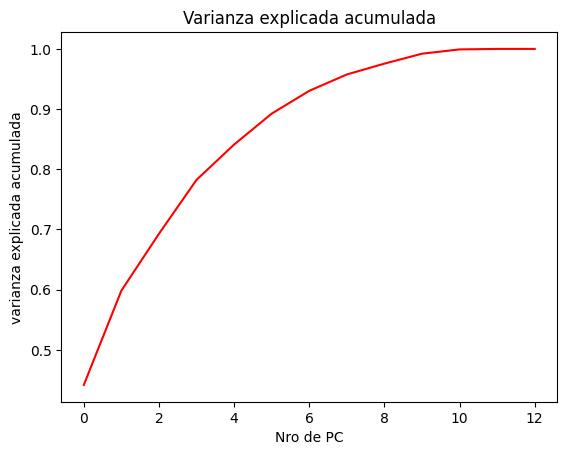

In [14]:
pca = PCA()
pca.fit(df_escalado)
print("Varianza explicada por componente", pca.explained_variance_ratio_)
print(pca.singular_values_)
print(np.cumsum(pca.explained_variance_))
plt.plot(list(range(df_escalado.shape[0])),np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Nro de PC'); plt.ylabel('varianza explicada acumulada'); plt.title('Varianza explicada acumulada')
plt.show()

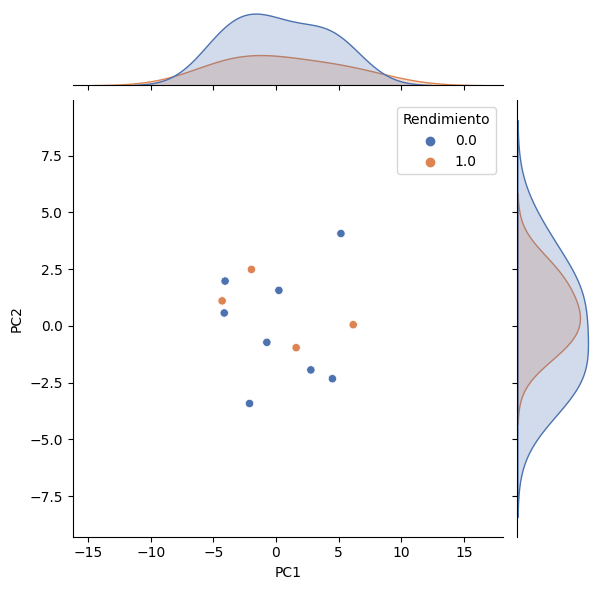

Varianza explicada por componente [13.87637444  4.92425934  2.96704099]
Porcentaje de varianza explicada [0.44168831 0.15674035 0.09444162]


In [15]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_escalado)   # Usamos los datos escalados en el PCA

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Rendimiento'] = Target

# Creamos un gráfico de dispersión con los resultados del PCA y el target
sns.jointplot(data=df_pca, x='PC1', y='PC2', hue='Rendimiento', palette='deep')
plt.show()

print("Varianza explicada por componente", pca.explained_variance_)
print("Porcentaje de varianza explicada", pca.explained_variance_ratio_)

In [16]:
df_pca
df_pca = df_pca.drop(3, axis=0)
df_pca

,PC1,PC2,PC3,Rendimiento
0,5.183380,4.070085,0.783276,0.0
1,0.231027,1.567482,0.646677,0.0
2,6.163875,0.055341,-0.413340,1.0
4,-1.961456,2.489372,1.365972,1.0
5,-2.111959,-3.414288,4.078484,0.0
6,2.782998,-1.936216,-0.140243,0.0
7,4.503282,-2.323227,-1.055561,0.0
8,-4.131752,0.571781,-2.033568,0.0
9,-0.730946,-0.721822,1.321432,0.0
10,-4.064944,1.977417,0.505913,0.0


Scatter plot con 3 dimiensiones del df_fisico

In [17]:
#Scatter plot tridimensional con datos fisicos
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Rendimiento', hover_data=['Rendimiento'])
fig.show()

# Analisis por KPCA de datos fisicos

In [18]:
from sklearn.decomposition import KernelPCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

Matriz disimilaridad con distancia euclidiana

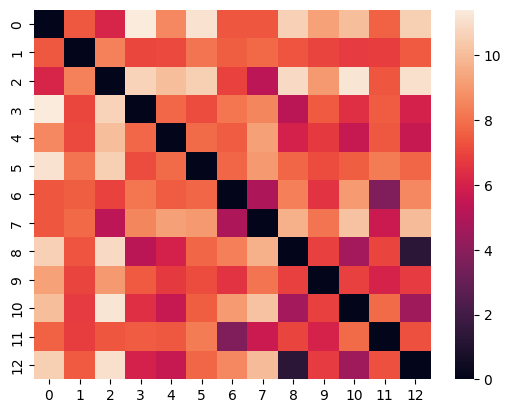

In [19]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
#MEDIDAS DE DISIMILARIDAD
pairwise=squareform(pdist(df_escalado,'euclidean'))
hm=sns.heatmap(pairwise)

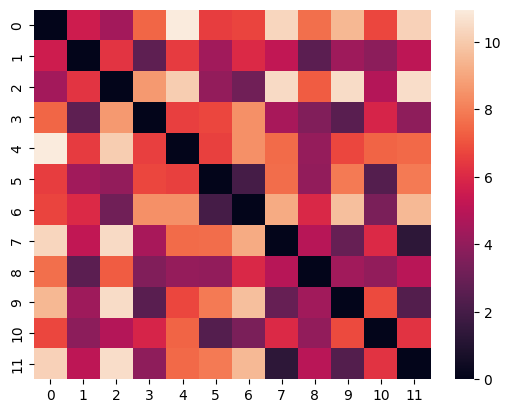

In [20]:
#MEDIDAS DE DISIMILARIDAD
pairwise=squareform(pdist(df_pca,'euclidean'))
hm=sns.heatmap(pairwise)

* KPCA linear

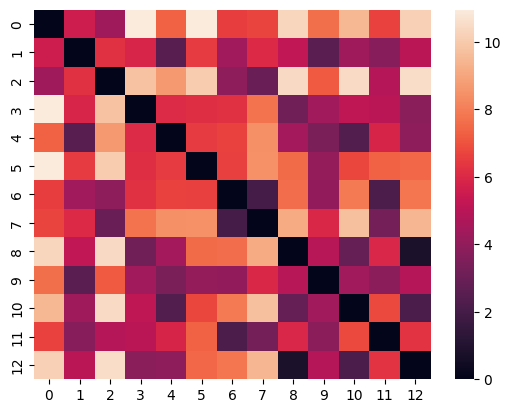

In [21]:
#   Kernel linear
linear_pca = KernelPCA(kernel= "linear",n_components=3)# extracts 2 features, specify the kernel as rbf
Z = linear_pca.fit_transform(df_escalado)
linear_pca = pd.DataFrame(Z, columns=['KPC1', 'KPC2', 'KPC3'])
linear_pca['Rendimiento'] = Target
pairwise=squareform(pdist(Z))
hm=sns.heatmap(pairwise) 

In [22]:
linear_pca = linear_pca.drop(3, axis=0)
linear_pca
fig = px.scatter_3d(linear_pca, x='KPC1', y='KPC2', z='KPC3', color='Rendimiento', hover_data=['Rendimiento'])
fig.show()

<Axes: >

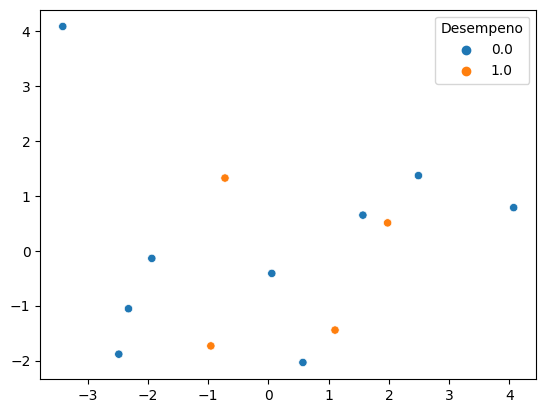

In [23]:
sns.scatterplot(x=Z[:, 1], y=Z[:, 2],hue=Target)

* Linear descartado

* KPCA RBF

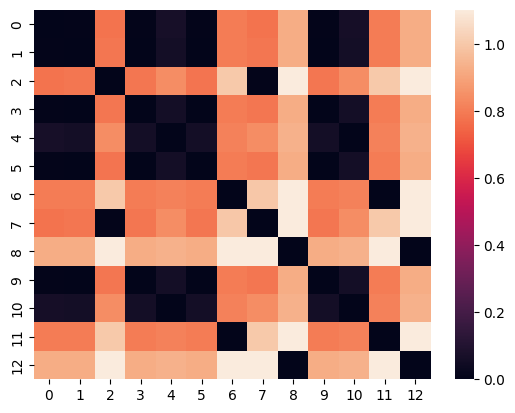

In [24]:
#   Kernel RBF
Kernel_pca = KernelPCA(kernel= "rbf",n_components=3, gamma= 0.5)# extracts 2 features, specify the kernel as rbf
ZRBF = Kernel_pca.fit_transform(df_escalado)
Kernel_pca = pd.DataFrame(ZRBF, columns=['KPC1', 'KPC2', 'KPC3'])
Kernel_pca['Rendimiento'] = Target
pairwise=squareform(pdist(ZRBF))
hm=sns.heatmap(pairwise)

In [25]:
Kernel_pca = Kernel_pca.drop(3, axis=0)
Kernel_pca
fig = px.scatter_3d(Kernel_pca, x='KPC1', y='KPC2', z='KPC3', color='Rendimiento', hover_data=['Rendimiento'])
fig.show()

<Axes: >

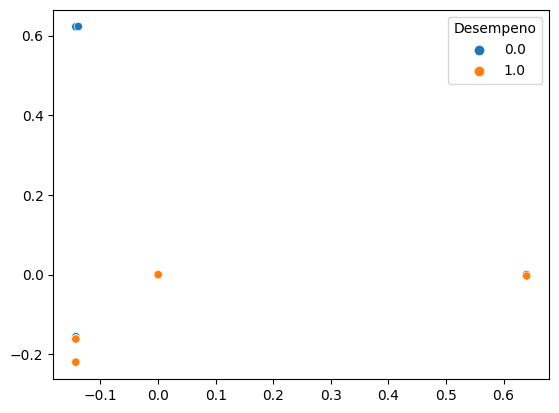

In [26]:
sns.scatterplot(x=ZRBF[:, 1], y=ZRBF[:, 2],hue=Target)

* RBF descartado pq se superponen muchas clases al variar el gamma

* KPCA POLY

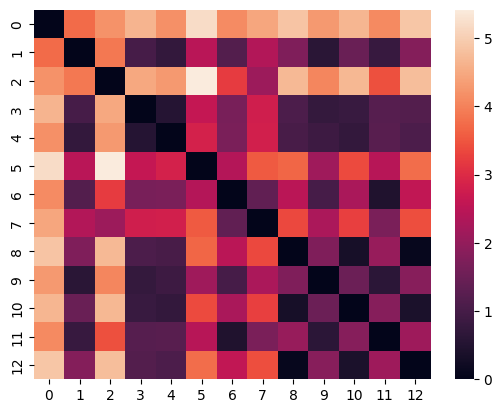

In [27]:
#   Kernel Poly
poly_pca = KernelPCA(kernel= "poly",n_components=3)# extracts 2 features, specify the kernel as rbf
Zpoly = poly_pca.fit_transform(df_escalado)
poly_pca = pd.DataFrame(Zpoly, columns=['KPC1', 'KPC2', 'KPC3'])
poly_pca['Rendimiento'] = Target
pairwise=squareform(pdist(Zpoly))
hm=sns.heatmap(pairwise)

In [28]:
poly_pca = poly_pca.drop(3, axis=0)
poly_pca
fig = px.scatter_3d(poly_pca, x='KPC1', y='KPC2', z='KPC3', color='Rendimiento', hover_data=['Rendimiento'])
fig.show()

<Axes: >

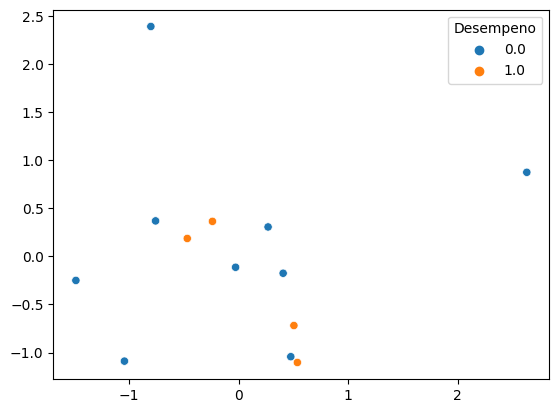

In [29]:
sns.scatterplot(x=Zpoly[:, 1], y=Zpoly[:, 2],hue=Target)

* Descartado

* KPCA COSINE

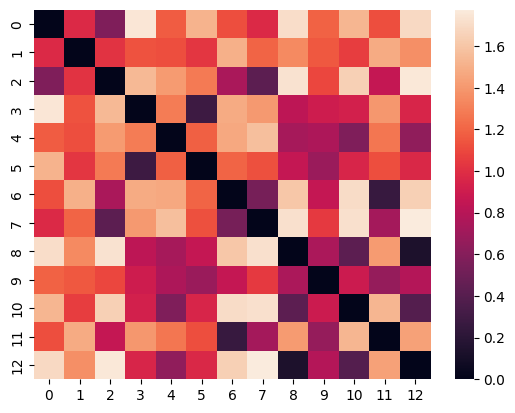

In [30]:
#   Kernel cosine
cosine_pca = KernelPCA(kernel= "cosine",n_components=3)
Zcos = cosine_pca.fit_transform(df_escalado)
cosine_pca = pd.DataFrame(Zcos, columns=['KPC1', 'KPC2', 'KPC3'])
cosine_pca['Rendimiento'] = Target
pairwise=squareform(pdist(Zcos))
hm=sns.heatmap(pairwise)

In [31]:
cosine_pca = cosine_pca.drop(3, axis=0)
cosine_pca
fig = px.scatter_3d(cosine_pca, x='KPC1', y='KPC2', z='KPC3', color='Rendimiento', hover_data=['Rendimiento'])
fig.show()

In [32]:
Zcos

array([[ 0.67964968,  0.68491062, -0.14514722],
       [ 0.03130776,  0.59298027,  0.58037009],
       [ 0.85243743,  0.21159399,  0.11830016],
       [-0.49632899, -0.41066938,  0.54255114],
       [-0.42606827,  0.42563861, -0.43132646],
       [-0.24268852, -0.3827807 ,  0.41382168],
       [ 0.75017764, -0.42607273, -0.25374091],
       [ 0.85427054, -0.20108378,  0.22599983],
       [-0.82472806, -0.1209758 , -0.16008681],
       [-0.08291239, -0.22280438, -0.23074498],
       [-0.78485746,  0.27519549, -0.01070978],
       [ 0.53496586, -0.39897513, -0.39523391],
       [-0.84522521, -0.02695708, -0.25405283]])

<Axes: >

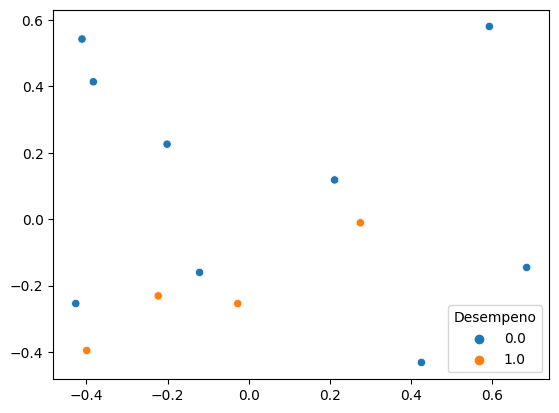

In [33]:
sns.scatterplot(x=Zcos[:, 1], y=Zcos[:, 2],hue=Target)

Paso raspado

**KPCA SIGMOID**

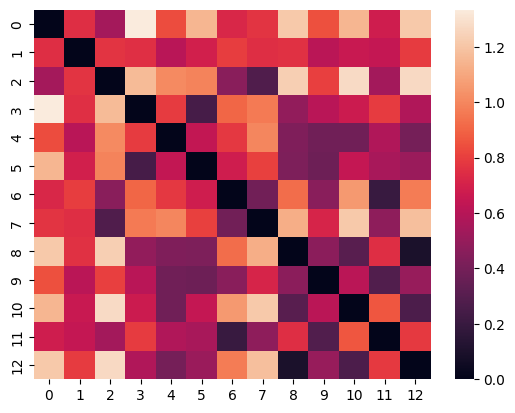

In [34]:
#   Kernel cosine
sigmoid_pca = KernelPCA(kernel= "sigmoid",n_components=3)
Zsigmoid = sigmoid_pca.fit_transform(df_escalado)
sigmoid_pca = pd.DataFrame(Zsigmoid, columns=['KPC1', 'KPC2', 'KPC3'])
sigmoid_pca['Rendimiento'] = Target
pairwise=squareform(pdist(Zsigmoid))
hm=sns.heatmap(pairwise)

In [35]:
sigmoid_pca = sigmoid_pca.drop(3, axis=0)
sigmoid_pca
fig = px.scatter_3d(sigmoid_pca, x='KPC1', y='KPC2', z='KPC3', color='Rendimiento', hover_data=['Rendimiento'])
fig.show()

<Axes: >

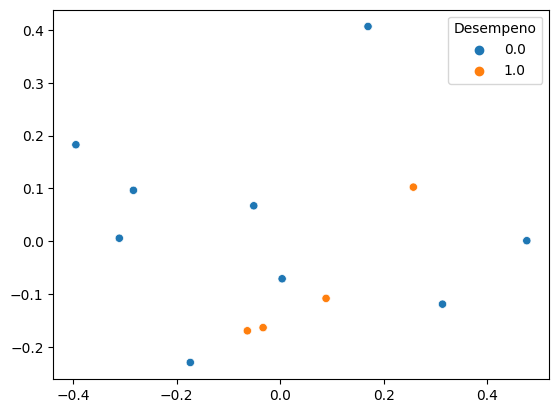

In [36]:
sns.scatterplot(x=Zsigmoid[:, 1], y=Zsigmoid[:, 2],hue=Target)

* Sigmoid pasa raspado

# Analisis de componentes principales **PCA datos antropometricos**

In [37]:
df_antro.shape
df_antro

,Tenista,Genero,masa_kg,estatura_cm,envergadura_cm,longitud_pie_cm,triceps_mm,subescapular_mm,biceps_mm,cresta_iliaca_mm,...,pantorrilla_maxima_cm,tobillo_minimo_cm,biacromial_cm,biiliocrestal_cm,biestiloideo_cm,humero_cm,femur_rodilla_cm,Desempeño,Edad,IMC
0,1,0,65.5,1.668,167.0,25.1,16.8,11.0,7.6,25.6,...,39.7,25.2,35.0,28.1,5.7,6.6,9.7,0.0,13,23.54
1,2,1,62.7,1.705,168.0,0.0,7.7,9.5,3.6,25.7,...,36.7,21.5,38.3,25.6,5.2,6.5,9.6,0.0,23,21.57
2,3,1,64.2,1.790,182.2,26.0,6.8,7.4,3.2,7.6,...,36.1,21.1,41.0,26.3,5.7,7.2,9.7,0.0,14,20.04
5,8,1,54.5,1.642,165.0,25.6,8.8,11.6,5.4,15.2,...,33.7,21.0,34.9,27.8,5.3,6.5,9.7,0.0,13,20.21
6,10,1,77.5,1.711,178.5,0.0,13.9,12.4,7.2,34.0,...,39.7,22.4,41.2,29.5,5.1,7.7,10.0,0.0,19,26.47
7,11,1,65.5,1.778,180.4,25.1,6.6,7.2,3.2,13.2,...,36.5,21.5,40.8,28.4,5.0,7.1,9.5,0.0,19,20.72
8,12,1,54.4,1.792,182.8,26.3,8.6,6.5,3.3,6.0,...,35.0,21.5,37.2,28.3,5.1,6.9,9.4,0.0,19,16.94
9,13,0,48.6,1.580,155.2,22.6,18.8,12.4,6.8,31.8,...,32.2,20.2,32.4,26.5,5.0,5.5,8.9,0.0,13,19.47
11,15,0,0.0,0.000,0.0,0.0,13.2,6.2,7.8,15.0,...,29.6,20.0,0.0,0.0,0.0,0.0,0.0,0.0,12,NaN
13,17,1,55.4,1.664,164.3,0.0,10.0,7.6,4.2,14.2,...,33.8,21.7,36.6,24.5,4.7,6.3,9.1,0.0,21,20.01


In [38]:
#Separo el target Rendimiento
Targets = df_antro['Desempeño']
#Separo caracteristicas de Tenista, genero y desempeño, IMC y edad
feature = df_antro.iloc[:,2:31]
feature.head
feature

,masa_kg,estatura_cm,envergadura_cm,longitud_pie_cm,triceps_mm,subescapular_mm,biceps_mm,cresta_iliaca_mm,supraespinal_mm,abdominal_mm,...,cadera_max_cm,muslo_1cm_cm,muslo_medio_cm,pantorrilla_maxima_cm,tobillo_minimo_cm,biacromial_cm,biiliocrestal_cm,biestiloideo_cm,humero_cm,femur_rodilla_cm
0,65.5,1.668,167.0,25.1,16.8,11.0,7.6,25.6,16.8,19.8,...,95.9,59.6,54.7,39.7,25.2,35.0,28.1,5.7,6.6,9.7
1,62.7,1.705,168.0,0.0,7.7,9.5,3.6,25.7,9.5,21.4,...,90.3,54.8,49.2,36.7,21.5,38.3,25.6,5.2,6.5,9.6
2,64.2,1.790,182.2,26.0,6.8,7.4,3.2,7.6,5.6,8.2,...,90.9,52.4,48.9,36.1,21.1,41.0,26.3,5.7,7.2,9.7
5,54.5,1.642,165.0,25.6,8.8,11.6,5.4,15.2,11.2,14.6,...,87.1,51.0,46.4,33.7,21.0,34.9,27.8,5.3,6.5,9.7
6,77.5,1.711,178.5,0.0,13.9,12.4,7.2,34.0,16.1,27.3,...,103.1,62.1,55.9,39.7,22.4,41.2,29.5,5.1,7.7,10.0
7,65.5,1.778,180.4,25.1,6.6,7.2,3.2,13.2,4.8,7.0,...,90.3,51.2,47.8,36.5,21.5,40.8,28.4,5.0,7.1,9.5
8,54.4,1.792,182.8,26.3,8.6,6.5,3.3,6.0,4.1,8.0,...,82.6,45.0,44.2,35.0,21.5,37.2,28.3,5.1,6.9,9.4
9,48.6,1.580,155.2,22.6,18.8,12.4,6.8,31.8,17.0,18.8,...,90.2,50.3,45.9,32.2,20.2,32.4,26.5,5.0,5.5,8.9
11,0.0,0.000,0.0,0.0,13.2,6.2,7.8,15.0,9.8,14.8,...,80.9,45.2,40.4,29.6,20.0,0.0,0.0,0.0,0.0,0.0
13,55.4,1.664,164.3,0.0,10.0,7.6,4.2,14.2,5.1,13.4,...,86.3,51.3,47.8,33.8,21.7,36.6,24.5,4.7,6.3,9.1


In [39]:
scaler = StandardScaler()
df_escaladoAntro = scaler.fit_transform(feature)
df_escaladoAntro = pd.DataFrame(df_escaladoAntro)
df_escaladoAntro

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.499381,0.199728,0.185657,0.791811,1.518740,0.966204,1.557607,0.824673,1.673766,0.842852,...,0.967467,1.434598,0.703174,0.887222,3.197406,-0.013537,0.408788,0.633028,0.197239,0.363869
1,0.339640,0.285991,0.208616,-1.218417,-0.900257,0.273860,-0.808378,0.835678,0.056137,1.108667,...,0.040817,0.423922,0.278490,0.170436,0.017190,0.321505,0.048093,0.262113,0.140343,0.322205
2,0.425215,0.484164,0.534626,0.863891,-1.139498,-0.695421,-1.044977,-1.156302,-0.808076,-1.084300,...,0.140101,-0.081416,0.255325,0.027079,-0.326617,0.595630,0.149087,0.633028,0.538613,0.363869
3,-0.128173,0.139110,0.139740,0.831855,-0.607850,1.243142,0.256315,-0.319891,0.432845,-0.021044,...,-0.488698,-0.376196,0.062287,-0.546350,-0.412568,-0.023690,0.365505,0.336296,0.140343,0.363869
4,1.183985,0.299980,0.449679,-1.218417,0.747851,1.612392,1.321008,1.749128,1.518651,2.088856,...,2.158874,1.960992,0.795832,0.887222,0.790756,0.615936,0.610777,0.187930,0.823092,0.488862
5,0.499381,0.456187,0.493300,0.791811,-1.192663,-0.787733,-1.044977,-0.539999,-0.985350,-1.283661,...,0.040817,-0.334085,0.170388,0.122650,0.017190,0.575325,0.452071,0.113747,0.481718,0.280540
6,-0.133878,0.488827,0.548401,0.887917,-0.661015,-1.110827,-0.985827,-1.332389,-1.140466,-1.117527,...,-1.233327,-1.639541,-0.107587,-0.235743,0.017190,0.209824,0.437644,0.187930,0.367926,0.238876
7,-0.464770,-0.005440,-0.085252,0.591589,2.050387,1.612392,1.084410,1.507008,1.718085,0.676719,...,0.024269,-0.523586,0.023679,-0.904743,-1.100183,-0.277510,0.177943,0.113747,-0.428615,0.030554
8,-3.237418,-3.689131,-3.648402,-1.218417,0.561774,-1.249296,1.675906,-0.341902,0.122615,0.012183,...,-1.514632,-1.597429,-0.401005,-1.525958,-1.272086,-3.567013,-3.645427,-3.595399,-3.557883,-3.677579
9,-0.076828,0.190402,0.123669,-1.218417,-0.288862,-0.603108,-0.453480,-0.429945,-0.918873,-0.220404,...,-0.621076,-0.313029,0.170388,-0.522457,0.189094,0.148908,-0.110613,-0.108802,0.026551,0.113883


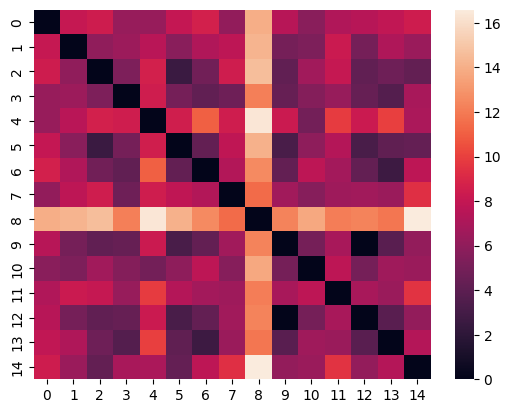

In [40]:
#Distancia euclidiana
pairwise=squareform(pdist(df_escaladoAntro,'euclidean'))
hm=sns.heatmap(pairwise)

* PCA normal

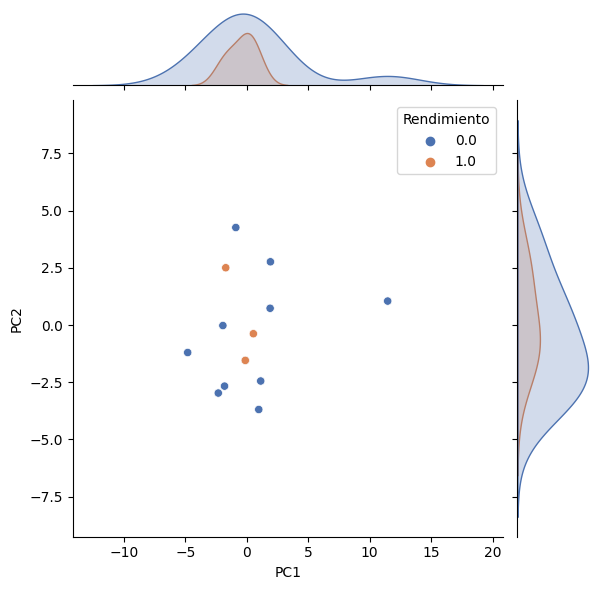

Varianza explicada por componente [14.18269727  7.29341707  3.35606413]
Porcentaje de varianza explicada [0.45645462 0.23473066 0.10801126]


In [41]:
pca = PCA(n_components=3)
X_pcaAntro = pca.fit_transform(df_escaladoAntro)   # Usamos los datos escalados en el PCA

df_pcaAntro = pd.DataFrame(X_pcaAntro, columns=['PC1', 'PC2', 'PC3'])
df_pcaAntro['Rendimiento'] = Targets

# Creamos un gráfico de dispersión con los resultados del PCA y el target
sns.jointplot(data=df_pcaAntro, x='PC1', y='PC2', hue='Rendimiento', palette='deep')
plt.show()

print("Varianza explicada por componente", pca.explained_variance_)
print("Porcentaje de varianza explicada", pca.explained_variance_ratio_)

In [42]:
df_pcaAntro = df_pcaAntro.drop(4,axis=0)
df_pcaAntro

,PC1,PC2,PC3,Rendimiento
0,-0.887414,4.264577,2.187698,0.0
1,-1.938923,-0.020892,-2.262487,0.0
2,-2.311005,-2.971332,-0.379104,0.0
3,0.541065,-0.377544,1.382939,1.0
5,-1.804080,-2.668828,-0.247271,0.0
6,0.978660,-3.690786,1.734649,0.0
7,1.927774,2.766283,1.690134,0.0
8,11.460685,1.049421,-2.771061,0.0
9,-0.115489,-1.544167,-1.106408,0.0
10,-1.706423,2.506557,-1.159388,1.0


In [43]:
#Scatter plot tridimensional con datos fisicos
fig = px.scatter_3d(df_pcaAntro, x='PC1', y='PC2', z='PC3', color='Rendimiento')
fig.show()

# Analisis por KPCA de datos antropometricos

* Kernel sigmoid

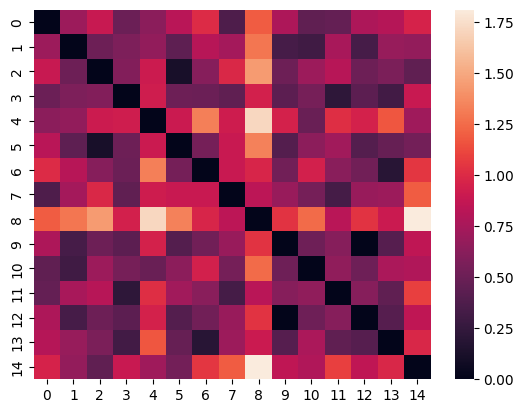

In [44]:
#   Kernel cosine
sigmoid_antro = KernelPCA(kernel= "sigmoid",n_components=3)
Zsigmoidantro = sigmoid_antro.fit_transform(df_escaladoAntro)
sigmoid_antro = pd.DataFrame(Zsigmoidantro, columns=['KPC1', 'KPC2', 'KPC3'])
sigmoid_antro['Rendimiento'] = Targets
pairwise=squareform(pdist(Zsigmoidantro))
hm=sns.heatmap(pairwise)

In [45]:
sigmoid_antro

,KPC1,KPC2,KPC3,Rendimiento
0,-0.046683,0.472024,-0.207566,0.0
1,-0.242678,0.005852,0.277593,0.0
2,-0.315965,-0.361826,-0.062611,0.0
3,0.140972,0.012873,-0.154528,1.0
4,-0.628139,0.484852,0.036621,NaN
5,-0.220746,-0.314760,-0.022656,0.0
6,0.286109,-0.465445,-0.126463,0.0
7,0.282297,0.422310,-0.041366,0.0
8,1.038140,0.098779,0.128567,0.0
9,0.042258,-0.161793,0.232669,0.0


In [46]:
sigmoid_antro = sigmoid_antro.drop(4, axis=0)
sigmoid_antro
fig = px.scatter_3d(sigmoid_antro, x='KPC1', y='KPC2', z='KPC3', color='Rendimiento', hover_data=['Rendimiento'])
fig.show()

<Axes: >

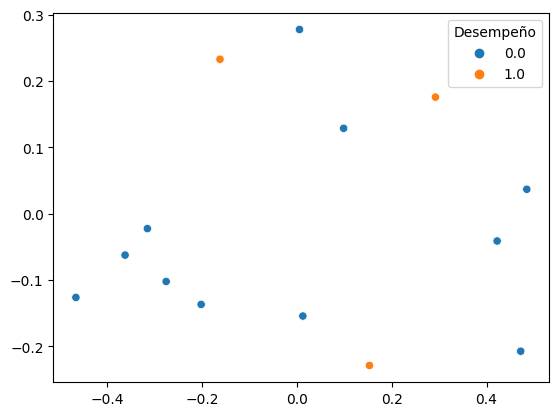

In [47]:
sns.scatterplot(x=Zsigmoidantro[:, 1], y=Zsigmoidantro[:, 2],hue=Targets)

* Descartado


* kernel cosine

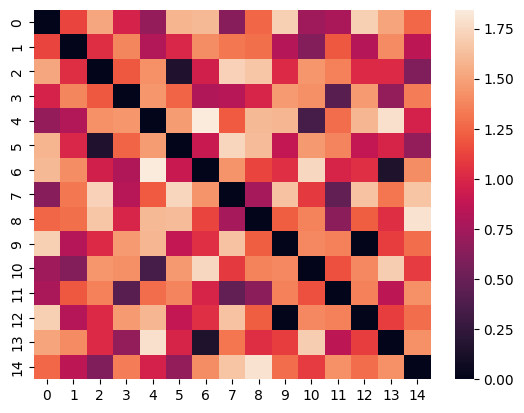

In [48]:
#   Kernel cosine
cosineAntro = KernelPCA(kernel= "cosine",n_components=3)
Zcosantro = cosineAntro.fit_transform(df_escaladoAntro)
cosineAntro = pd.DataFrame(Zcosantro, columns=['KPC1', 'KPC2', 'KPC3'])
cosineAntro['Rendimiento'] = Targets
pairwise=squareform(pdist(Zcosantro))
hm=sns.heatmap(pairwise)

In [49]:
cosineAntro = cosineAntro.drop(4, axis=0)
cosineAntro
fig = px.scatter_3d(cosineAntro, x='KPC1', y='KPC2', z='KPC3', color='Rendimiento', hover_data=['Rendimiento'])
fig.show()

<Axes: >

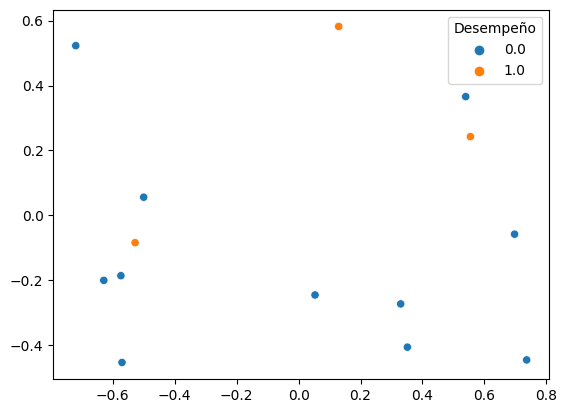

In [50]:
sns.scatterplot(x=Zcosantro[:, 1], y=Zcosantro[:, 2],hue=Targets)

* Kernel cosine descartado

* Kernel linear

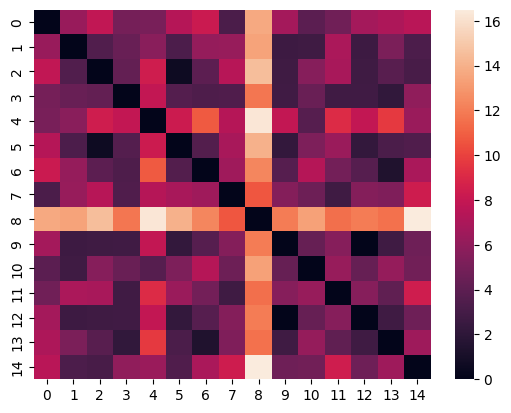

In [51]:
#   Kernel Linear
LinearAntro = KernelPCA(kernel= "linear",n_components=3)
Zlinearantro = LinearAntro.fit_transform(df_escaladoAntro)
LinearAntro = pd.DataFrame(Zlinearantro, columns=['KPC1', 'KPC2', 'KPC3'])
LinearAntro['Rendimiento'] = Targets
pairwise=squareform(pdist(Zlinearantro, 'euclidean'))
hm=sns.heatmap(pairwise)


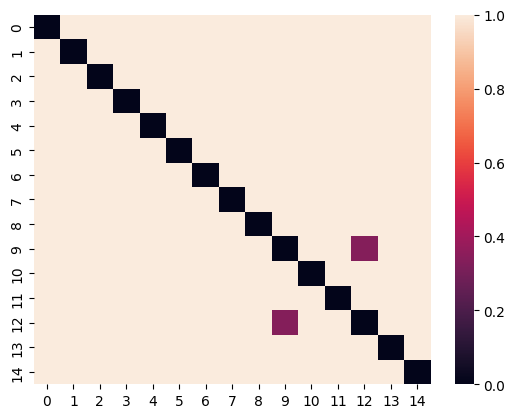

In [52]:
pairwise=squareform(pdist(Zlinearantro, 'Hamming'))
hm=sns.heatmap(pairwise)

In [53]:
LinearAntro = LinearAntro.drop(4, axis=0)
LinearAntro
fig = px.scatter_3d(LinearAntro, x='KPC1', y='KPC2', z='KPC3', color='Rendimiento', hover_data=['Rendimiento'])
fig.show()

<Axes: >

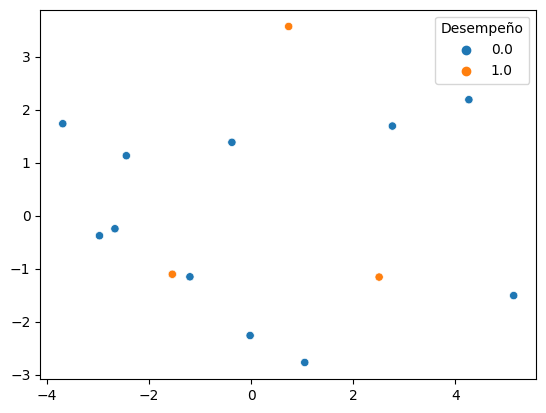

In [54]:
sns.scatterplot(x=Zlinearantro[:, 1], y=Zlinearantro[:, 2],hue=Targets)

* Linear descartado

* Kernel poly

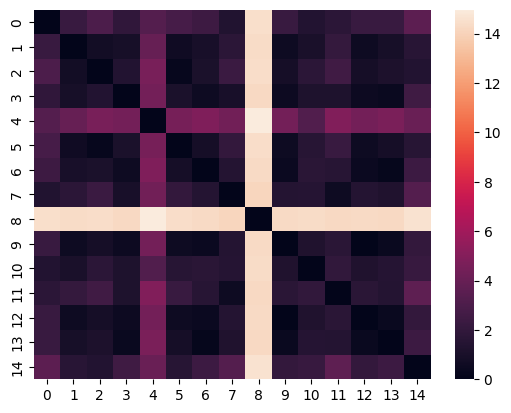

In [55]:
#   Kernel POLY
polyAntro = KernelPCA(kernel= "poly",n_components=3)
Zpolyantro = polyAntro.fit_transform(df_escaladoAntro)
polyAntro = pd.DataFrame(Zpolyantro, columns=['KPC1', 'KPC2', 'KPC3'])
polyAntro['Rendimiento'] = Targets
pairwise=squareform(pdist(Zpolyantro))
hm=sns.heatmap(pairwise)


In [56]:
polyAntro = polyAntro.drop(4, axis=0)
polyAntro
fig = px.scatter_3d(polyAntro, x='KPC1', y='KPC2', z='KPC3', color='Rendimiento', hover_data=['Rendimiento'])
fig.show()

<Axes: >

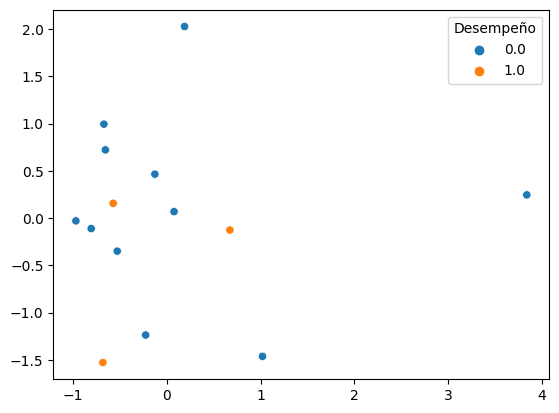

In [57]:
sns.scatterplot(x=Zpolyantro[:, 1], y=Zpolyantro[:, 2],hue=Targets)

* vamos a probarla

* Kernel RBF

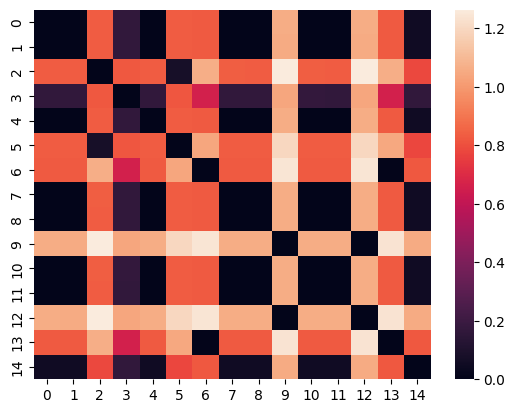

In [58]:
#   Kernel RBF
rbfAntro = KernelPCA(kernel= "rbf",n_components=3, gamma=0.3)
Zrbfantro = rbfAntro.fit_transform(df_escaladoAntro)
rbfAntro = pd.DataFrame(Zrbfantro, columns=['KPC1', 'KPC2', 'KPC3'])
rbfAntro['Rendimiento'] = Targets
pairwise=squareform(pdist(Zrbfantro))
hm=sns.heatmap(pairwise)

In [59]:
rbfAntro = rbfAntro.drop(4, axis=0)
rbfAntro
fig = px.scatter_3d(rbfAntro, x='KPC1', y='KPC2', z='KPC3', color='Rendimiento', hover_data=['Rendimiento'])
fig.show()

<Axes: >

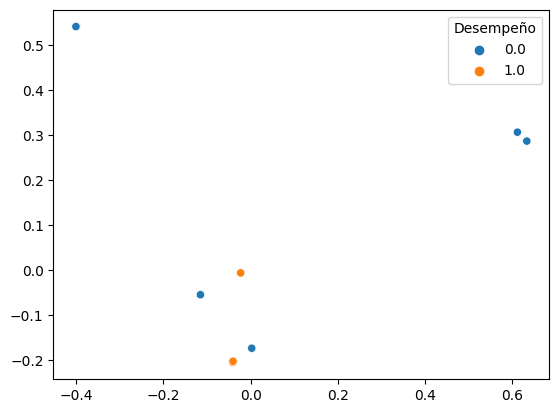

In [60]:
sns.scatterplot(x=Zrbfantro[:, 1], y=Zrbfantro[:, 2],hue=Targets)

In [61]:
del Target[13]

**CROSS VALIDATION DATOS FÍSICOS**

Kernel cosin

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#Kernel Cosin
X = cosine_pca
y = Target

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

#Entrenar el modelo 
knn.fit(X,y)
X_pred = knn.predict(X)

#Resultados
print("Accuracy ",accuracy_score(y,X_pred))
print(classification_report(y,X_pred))
print(confusion_matrix(y,X_pred))

# Realizar la clasificación por validación cruzada
scores = cross_val_score(knn, X, y, cv=4) 

# Mostrar los resultados
print("Exactitud por partición:", scores)
print("Exactitud promedio:", scores.mean())



Accuracy  0.5833333333333334
              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71         8
         1.0       0.33      0.25      0.29         4

    accuracy                           0.58        12
   macro avg       0.50      0.50      0.50        12
weighted avg       0.56      0.58      0.57        12

[[6 2]
 [3 1]]
Exactitud por partición: [0.66666667 0.33333333 0.33333333 0.66666667]
Exactitud promedio: 0.5


Kernel Sigmoid

In [63]:
#Kernel Sigmoid
X = sigmoid_pca
y = Target

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

#Entrenar el modelo 
knn.fit(X,y)
X_pred = knn.predict(X)

#Resultados
print("Accuracy ",accuracy_score(y,X_pred))
print(classification_report(y,X_pred))
print(confusion_matrix(y,X_pred))

# Realizar la clasificación por validación cruzada
scores = cross_val_score(knn, X, y, cv=4)  # cv=5 indica 5 particiones para validación cruzada

# Mostrar los resultados
print("Exactitud por partición:", scores)
print("Exactitud promedio:", scores.mean())

Accuracy  0.6666666666666666
              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78         8
         1.0       0.50      0.25      0.33         4

    accuracy                           0.67        12
   macro avg       0.60      0.56      0.56        12
weighted avg       0.63      0.67      0.63        12

[[7 1]
 [3 1]]
Exactitud por partición: [0.66666667 0.33333333 0.66666667 1.        ]
Exactitud promedio: 0.6666666666666666


**CROSS VALIDATION DATOS ANTROPOMETRICOS**

Kernel cosin

In [64]:
del Targets[15]

In [65]:
#Kernel Poly
X = polyAntro
y = Targets

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

#Entrenar el modelo 
knn.fit(X,y)
X_pred = knn.predict(X)

#Resultados
print("Accuracy ",accuracy_score(y,X_pred))
print(classification_report(y,X_pred))
print(confusion_matrix(y,X_pred))

# Realizar la clasificación por validación cruzada
scores = cross_val_score(knn, X, y, cv=7)  

# Mostrar los resultados
print("Exactitud por partición:", scores)
print("Exactitud promedio:", scores.mean())

Accuracy  0.7142857142857143
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        11
         1.0       0.33      0.33      0.33         3

    accuracy                           0.71        14
   macro avg       0.58      0.58      0.58        14
weighted avg       0.71      0.71      0.71        14

[[9 2]
 [2 1]]
Exactitud por partición: [1.  0.5 1.  0.  0.5 0.5 0.5]
Exactitud promedio: 0.5714285714285714


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=7.



*Kernel rbf*

In [66]:
#Kernel RBF
X = rbfAntro
y = Targets

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=7)

#Entrenar el modelo 
knn.fit(X,y)
X_pred = knn.predict(X)

#Resultados
print("Accuracy ",accuracy_score(y,X_pred))
print(classification_report(y,X_pred))
print(confusion_matrix(y,X_pred))

# Realizar la clasificación por validación cruzada
scores = cross_val_score(knn, X, y, cv=4)  

# Mostrar los resultados
print("Exactitud por partición:", scores)
print("Exactitud promedio:", scores.mean())



Accuracy  0.7857142857142857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=4.



              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        11
         1.0       0.00      0.00      0.00         3

    accuracy                           0.79        14
   macro avg       0.39      0.50      0.44        14
weighted avg       0.62      0.79      0.69        14

[[11  0]
 [ 3  0]]
Exactitud por partición: [0.75       0.75       1.         0.66666667]
Exactitud promedio: 0.7916666666666666


clasificador datos fisicos con PCA

In [67]:

X = df_pca 
y = Target

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

#Entrenar el modelo 
knn.fit(X,y)
X_pred = knn.predict(X)

#Resultados
print("Accuracy ",accuracy_score(y,X_pred))
print(classification_report(y,X_pred))
print(confusion_matrix(y,X_pred))

# Realizar la clasificación por validación cruzada
scores = cross_val_score(knn, X, y, cv=3)  # cv=5 indica 5 particiones para validación cruzada

# Mostrar los resultados
print("Exactitud por partición:", scores)
print("Exactitud promedio:", scores.mean())

Accuracy  0.75
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.82         8
         1.0       0.67      0.50      0.57         4

    accuracy                           0.75        12
   macro avg       0.72      0.69      0.70        12
weighted avg       0.74      0.75      0.74        12

[[7 1]
 [2 2]]
Exactitud por partición: [0.5 0.  0.5]
Exactitud promedio: 0.3333333333333333


clasificador datos Antropometricos con PCA

In [68]:

X = df_pcaAntro
y = Targets

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

#Entrenar el modelo 
knn.fit(X,y)
X_pred = knn.predict(X)

#Resultados
print("Accuracy ",accuracy_score(y,X_pred))
print(classification_report(y,X_pred))
print(confusion_matrix(y,X_pred))

# Realizar la clasificación por validación cruzada
scores = cross_val_score(knn, X, y, cv=3)  # cv=5 indica 5 particiones para validación cruzada

# Mostrar los resultados
print("Exactitud por partición:", scores)
print("Exactitud promedio:", scores.mean())

Accuracy  0.7142857142857143
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83        11
         1.0       0.00      0.00      0.00         3

    accuracy                           0.71        14
   macro avg       0.38      0.45      0.42        14
weighted avg       0.60      0.71      0.65        14

[[10  1]
 [ 3  0]]
Exactitud por partición: [0.6  0.6  0.75]
Exactitud promedio: 0.65
